#  USDA食品数据库(json)

每种食物都带有若干标识性属性以及两个有关营养成分和分量的列表。这种形式的数据不是很适合
分析工作，因此我们需要做一些规整化以使其具有更好用的形式。



In [21]:
import json 
import pandas as pd
db = json.load(open("data/usda-food/database.json"))
len(db)

6636

In [22]:
''' db中的每个条目都是一个含有某种食物全部数据的字典。nutrients字段是一个字典列表，其中的每 个字典对应一种营养成分:'''
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [23]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [24]:

nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients[:10]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
7,0.00,g,"Fiber, total dietary",Composition
8,673.00,mg,"Calcium, Ca",Elements
9,0.64,mg,"Iron, Fe",Elements


In [25]:
info_keys = ["description","group","id","manufactuter"]
info = pd.DataFrame(db,columns=info_keys)

In [26]:
info[:5]

,description,group,id,manufactuter
0,"Cheese, caraway",Dairy and Egg Products,1008,NaN
1,"Cheese, cheddar",Dairy and Egg Products,1009,NaN
2,"Cheese, edam",Dairy and Egg Products,1018,NaN
3,"Cheese, feta",Dairy and Egg Products,1019,NaN
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,NaN


In [27]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   6636 non-null   object 
 1   group         6636 non-null   object 
 2   id            6636 non-null   int64  
 3   manufactuter  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 207.5+ KB


In [28]:
# 查看食物类别分布情况
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [39]:
''' 现在，为了对全部营养数据做一些分析，
最简单的办法是将所有食物的营养成分整合到一个大表中。
我们分几个步骤来实现该目的。首先，将各食物的营养成分列表转换为一个DataFrame，
并添加一个表示编号的列，然后将该DataFrame添加到一个列表中。
最后通过concat将这些东西连接起 来就可以了:'''
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [40]:
nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

In [41]:
col_mapping = {"descrption":"food","group":"fgroup"}


In [42]:
info  =info.rename(columns=col_mapping,copy = False)

In [43]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   6636 non-null   object 
 1   fgroup        6636 non-null   object 
 2   id            6636 non-null   int64  
 3   manufactuter  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 207.5+ KB


In [44]:
col_mapping = {'description' : 'nutrient',  'group' : 'nutgroup'}

In [45]:
col_mapping

{'description': 'nutrient', 'group': 'nutgroup'}

In [46]:
nutrients = nutrients.rename(columns=col_mapping,copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [47]:
info

,description,fgroup,id,manufactuter
0,"Cheese, caraway",Dairy and Egg Products,1008,NaN
1,"Cheese, cheddar",Dairy and Egg Products,1009,NaN
2,"Cheese, edam",Dairy and Egg Products,1018,NaN
3,"Cheese, feta",Dairy and Egg Products,1019,NaN
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,NaN
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,NaN
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,NaN
6633,"Babyfood, juice, pear",Baby Foods,43408,NaN
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,NaN


In [49]:
ndata = pd.merge(nutrients,info,on="id",how="outer")
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   description   375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufactuter  0 non-null       float64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


<AxesSubplot:ylabel='fgroup'>

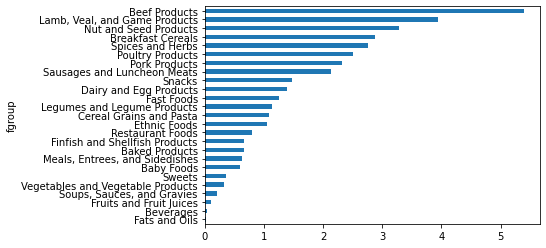

In [51]:
# 我们现在可以根据食物分类和营养类型画出一张中位值图
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [60]:
# 各营养成分最丰富的食物
by_nutrient = ndata.groupby(["nutgroup","nutrient"])

get_maximum = lambda x:x.loc[x.value.idxmax()]
get_minimum = lambda x:x.loc[x.value.idmin()]


In [62]:
for a,b in by_nutrient:
    print(a,b)

('Amino Acids', 'Alanine')         value units nutrient     nutgroup     id  \
48      0.711     g  Alanine  Amino Acids   1008   
127     0.703     g  Alanine  Amino Acids   1009   
198     0.764     g  Alanine  Amino Acids   1018   
269     0.639     g  Alanine  Amino Acids   1019   
340     0.741     g  Alanine  Amino Acids   1028   
...       ...   ...      ...          ...    ...   
374349  2.017     g  Alanine  Amino Acids  23634   
374422  1.356     g  Alanine  Amino Acids  23635   
374495  1.406     g  Alanine  Amino Acids  23636   
374568  1.349     g  Alanine  Amino Acids  23637   
374644  1.798     g  Alanine  Amino Acids  23638   

                                              description  \
48                                        Cheese, caraway   
127                                       Cheese, cheddar   
198                                          Cheese, edam   
269                                          Cheese, feta   
340                    Cheese, mozzarella, 

In [65]:

max_foods = by_nutrient.apply(get_maximum)[['value', 'nutrient']]
# make the food a little smaller
max_foods.nutrient = max_foods.nutrient.str[:50]
max_foods.nutrient

nutgroup     nutrient                    
Amino Acids  Alanine                                              Alanine
             Arginine                                            Arginine
             Aspartic acid                                  Aspartic acid
             Cystine                                              Cystine
             Glutamic acid                                  Glutamic acid
                                                         ...             
Vitamins     Vitamin D2 (ergocalciferol)      Vitamin D2 (ergocalciferol)
             Vitamin D3 (cholecalciferol)    Vitamin D3 (cholecalciferol)
             Vitamin E (alpha-tocopherol)    Vitamin E (alpha-tocopherol)
             Vitamin E, added                            Vitamin E, added
             Vitamin K (phylloquinone)          Vitamin K (phylloquinone)
Name: nutrient, Length: 94, dtype: object